In [1]:
## Machine Learning - Supervised - Linear Regression

In [3]:
## Importing Libraries

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
import string

In [7]:
%matplotlib inline

In [9]:
## Lets import the data and load it into a dataframe

In [11]:
df = pd.read_csv(r"C:\Users\gmraj\Documents\Refactored_Py_DS_ML_Bootcamp-master\11-Linear-Regression\Ecommerce Customers.csv")

In [13]:
## EDA + Data Wrangling + Feature Engineering

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Email                 500 non-null    object 
 1   Address               500 non-null    object 
 2   Avatar                500 non-null    object 
 3   Avg. Session Length   500 non-null    float64
 4   Time on App           500 non-null    float64
 5   Time on Website       500 non-null    float64
 6   Length of Membership  500 non-null    float64
 7   Yearly Amount Spent   500 non-null    float64
dtypes: float64(5), object(3)
memory usage: 31.4+ KB


In [21]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Avg. Session Length,500.0,33.053194,0.992563,29.532429,32.341822,33.082008,33.711985,36.139662
Time on App,500.0,12.052488,0.994216,8.508152,11.388153,11.983231,12.753850,15.126994
Time on Website,500.0,37.060445,1.010489,33.913847,36.349257,37.069367,37.716432,40.005182
Length of Membership,500.0,3.533462,0.999278,0.269901,2.930450,3.533975,4.126502,6.922689
Yearly Amount Spent,500.0,499.314038,79.314782,256.670582,445.038277,498.887875,549.313828,765.518462


In [29]:
## Lets check the correlations of the numeric values

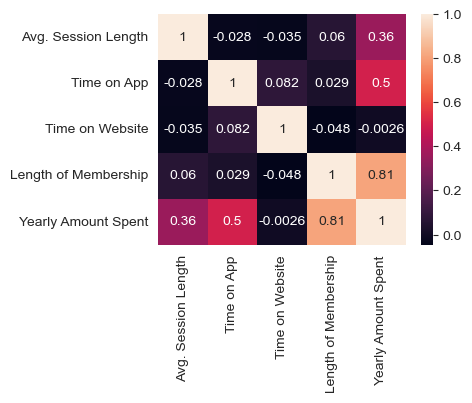

In [27]:
plt.figure(figsize=(4,3))
sns.heatmap(df.corr(numeric_only=True),annot=True)
plt.show()

In [31]:
## Length of Membership, Time on App and Avg. Session Length have (in decreasing order) positive correlations with Yearly Spent

<Figure size 400x300 with 0 Axes>

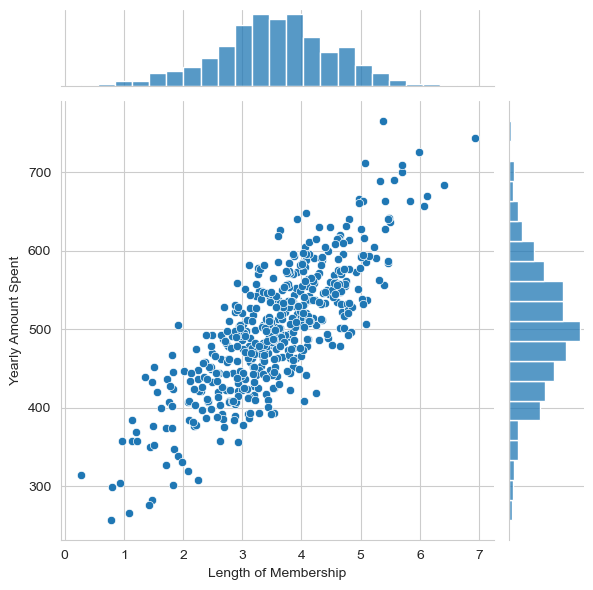

In [35]:
plt.figure(figsize=(4,3))
sns.jointplot(x='Length of Membership',y='Yearly Amount Spent',data=df)
plt.show()

<Figure size 400x300 with 0 Axes>

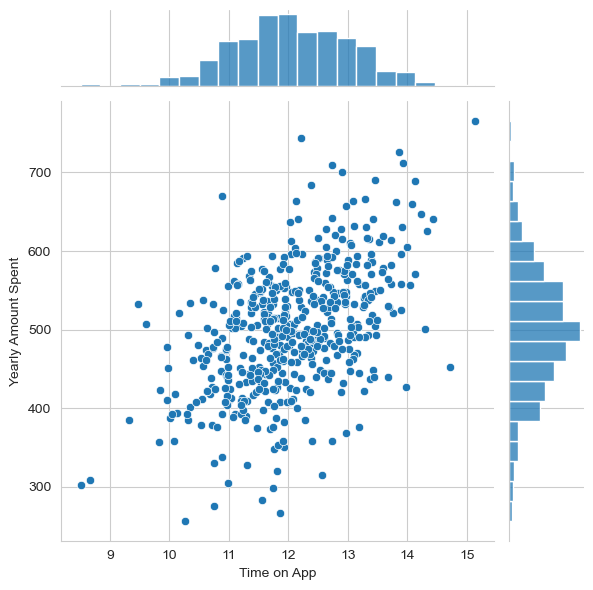

In [37]:
plt.figure(figsize=(4,3))
sns.jointplot(x='Time on App',y='Yearly Amount Spent',data=df)
plt.show()

In [54]:
## Lets check for missing values

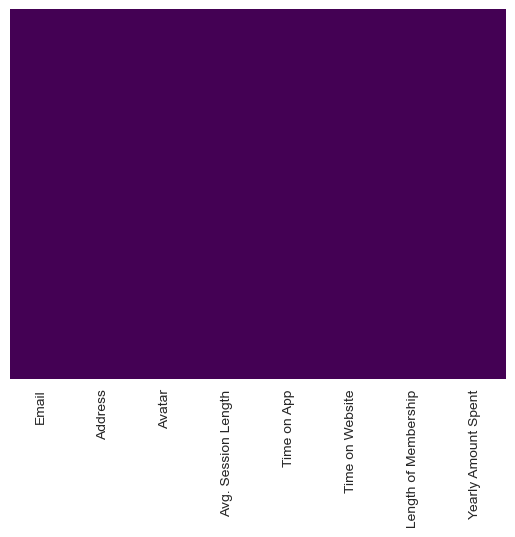

In [58]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')
plt.show()

In [60]:
## No Missing Values

In [62]:
## Lets proceed with Feature Engineering. We will wrangle the data from Categorical columns and try to obtain some meaningful insights

In [181]:
email = df['Email'].apply(lambda x: x.split('@')[1])
email = pd.DataFrame(email)
email = email['Email'].apply(lambda x: x.split('.')[0])
email = pd.DataFrame(email)

In [19]:
df.head(5)

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


In [173]:
## Lets create dummy variables for Email and Avatar so that we can use it into ML algorithm 

In [195]:
# pd.get_dummies(email['Email'],drop_first=True,dtype='float')
# pd.get_dummies(df['Avatar'],drop_first=True,dtype='float')

In [197]:
## After creating dummy variable the overall unique values in Email and Avatar are approx 50% of total rows. Hence we wont be using them

In [201]:
## Lets drop unnecessary columns

In [203]:
df.drop(['Email','Address','Avatar'],axis=1,inplace=True)

In [205]:
df.head(5)

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,34.497268,12.655651,39.577668,4.082621,587.951054
1,31.926272,11.109461,37.268959,2.664034,392.204933
2,33.000915,11.330278,37.110597,4.104543,487.547505
3,34.305557,13.717514,36.721283,3.120179,581.852344
4,33.330673,12.795189,37.536653,4.446308,599.406092


In [207]:
from sklearn.model_selection import train_test_split

In [209]:
df.columns

Index(['Avg. Session Length', 'Time on App', 'Time on Website',
       'Length of Membership', 'Yearly Amount Spent'],
      dtype='object')

In [211]:
X = df[['Avg. Session Length', 'Time on App', 'Time on Website',
       'Length of Membership']]
y = df['Yearly Amount Spent']

In [213]:
from sklearn.linear_model import LinearRegression

In [262]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)
lr = LinearRegression()
lr.fit(X_train,y_train)
predictions_i = lr.predict(X_test)   

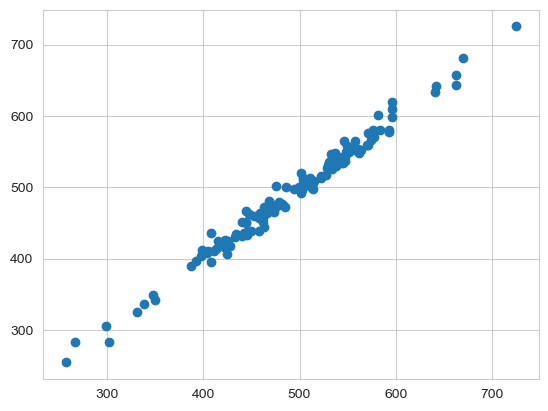

In [272]:
plt.scatter(y_test,predictions_i)
plt.show()

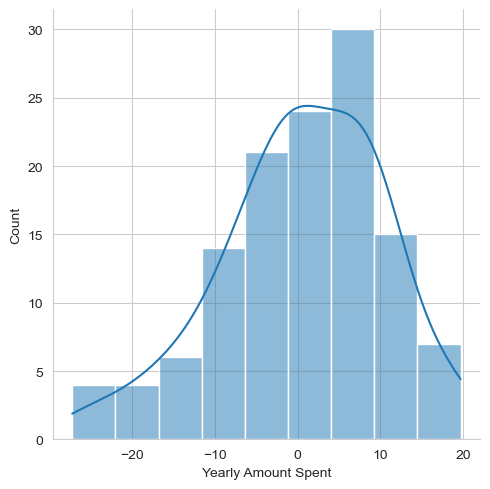

In [274]:
sns.displot(y_test-predictions_i,kde=True)
plt.show()

In [276]:
from sklearn import metrics

In [278]:
print(metrics.root_mean_squared_error(y_test,predictions_i))

9.959892049624735


In [280]:
lr.intercept_

-1041.9498482883348

In [286]:
pd.DataFrame(lr.coef_,X.columns,columns=['Coef'])

,Coef
Avg. Session Length,25.567949
Time on App,39.110419
Time on Website,0.195721
Length of Membership,61.526498
